# Practical Application III: Comparing Classifiers

Overview: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the Materials and Methods section of the paper.  How many marketing campaigns does this data represent?

The was gathered from May 2008 to November 2010 containing 41,188 campaign calls.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



##### Data Transformation Candidates

After initial analysis I find these features are candidate for transformation:


Attributes for One-Hot Encoding (Categorical Variables)
These attributes have categorical values and should be One-Hot Encoded:

- Job (`job`) – Type of job (e.g., 'admin.', 'blue-collar', 'entrepreneur', etc.)
- Marital status (`marital`) – Marital status (e.g., 'divorced', 'married', 'single', 'unknown')
- Education (`education`) – Education level (e.g., 'basic.4y', 'high.school', 'university.degree', etc.)
- Default (`default`) – Has credit in default? (e.g., 'yes', 'no', 'unknown')
- Housing loan (`housing`) – Has housing loan? (e.g., 'yes', 'no', 'unknown')
- Personal loan (`loan`) – Has personal loan? (e.g., 'yes', 'no', 'unknown')
- Contact typ (`contact`) – Communication type (e.g., 'cellular', 'telephone')
- Month** (`month`) – Last contact month (e.g., 'jan', 'feb', 'mar', ..., 'dec')
- Day of the week (`day_of_week`) – Last contact day (e.g., 'mon', 'tue', 'wed', etc.)
- Previous outcome (`poutcome`) – Outcome of the previous campaign (e.g., 'failure', 'nonexistent', 'success')
- Target variable (`age`) – Numeric
- Duration (`duration`) – Last contact duration (important but should be excluded for realistic predictions)
- Number of contacts in campaign (`campaign`) – Numeric
- Days since last contact (`pdays`) – Numeric (999 means "never contacted before")
- Previous contacts (`previous`) – Numeric
- Employment variation rate (`emp.var.rate`) – Numeric
- Consumer price index (`cons.price.idx`) – Numeric
- Consumer confidence index (`cons.conf.idx`) – Numeric
- Euribor 3-month rate (`euribor3m`) – Numeric
- Number of employees (`nr.employed`) – Numeric


These attributes have continuous or count values and should be **scaled** (e.g., using MinMaxScaler, StandardScaler, or RobustScaler):

- Age (`age`) – Numeric
- Duration (`duration`) – Last contact duration (important but should be excluded for realistic predictions)
- Number of contacts in campaign (`campaign`) – Numeric
- Days since last contact (`pdays`) – Numeric (999 means "never contacted before")
- Previous contacts (`previous`) – Numeric
- Employment variation rate (`emp.var.rate`) – Numeric
- Consumer price index (`cons.price.idx`) – Numeric
- Consumer confidence index (`cons.conf.idx`) – Numeric
- Euribor 3-month rate (`euribor3m`) – Numeric
- Number of employees (`nr.employed`) – Numeric



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  # Added Decision Trees
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, roc_curve, auc,
    roc_auc_score, precision_recall_curve, average_precision_score
)
from sklearn.dummy import DummyClassifier
from sklearn import set_config

import time
import warnings

warnings.filterwarnings('ignore')
set_config("diagram")

# Load the dataset
df = pd.read_csv('data/bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Separate features and target
# 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### Business Objective


The goal is to improve the bank's marketing efficiency by predicting whether a customer will subscribe to a long-term deposit. 

By analyzing customer demographics, financial behavior, and past interactions, the bank can identify high-potential leads and tailor its outreach accordingly. 

This predictive capability helps optimize marketing costs, reducing unnecessary calls to uninterested customers while increasing conversions. Additionally, understanding key influencing factors enables the bank to design more attractive deposit offers and personalized financial products. 

Ultimately, the goal is to enhance customer engagement, maximize deposit subscriptions, and improve overall financial performance.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

##### Identify categorical and numerical features

In [15]:
# Identify categorical and numerical columns, assign to variables

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

Create Transformers

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        (
          'cat', 
            OneHotEncoder(
              handle_unknown='ignore', 
              drop='if_binary'
            ), 
          categorical_cols
         )
    ])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

#### Create a `no-skill` model for a baseline:

Dataset shape: (41188, 21)

Target variable distribution:
y
no     0.887346
yes    0.112654

Total count: 41188

Training Uniform No-Skill Model...
Training completed in 0.0011 seconds

Performance Metrics:
           Metric  Value
         Accuracy 0.5032
        Precision 0.1164
           Recall 0.5123
         F1 Score 0.1897
          ROC AUC 0.5000
           PR AUC 0.1135
Training Time (s) 0.0011

Confusion Matrix:
True Negatives: 3666
False Positives: 3637
False Negatives: 456
True Positives: 479

Additional Metrics:
Specificity (True Negative Rate): 0.5020

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.50      0.64      7303
           1       0.12      0.51      0.19       935

    accuracy                           0.50      8238
   macro avg       0.50      0.51      0.42      8238
weighted avg       0.80      0.50      0.59      8238



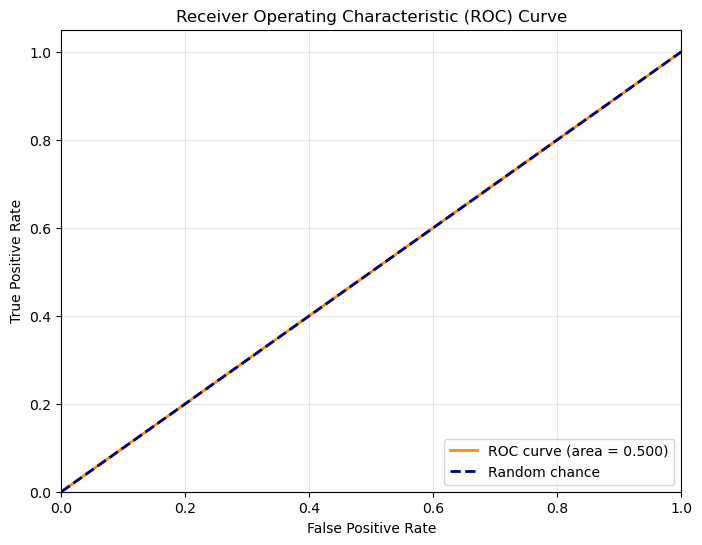

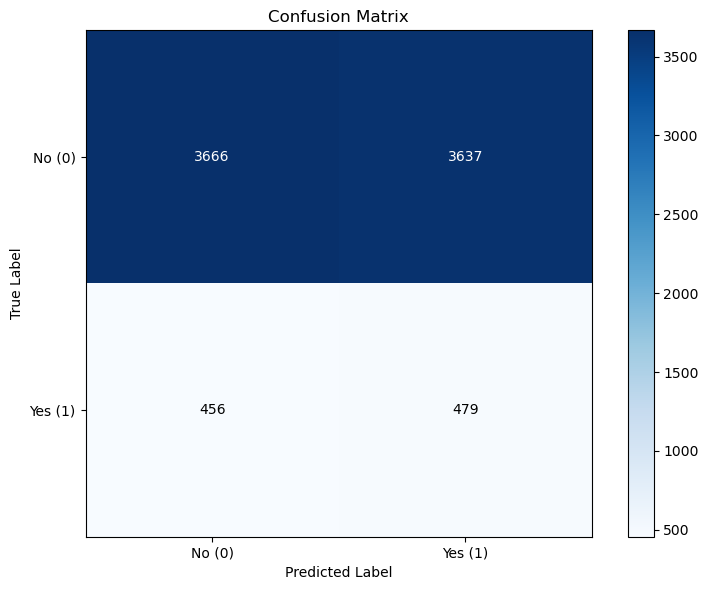

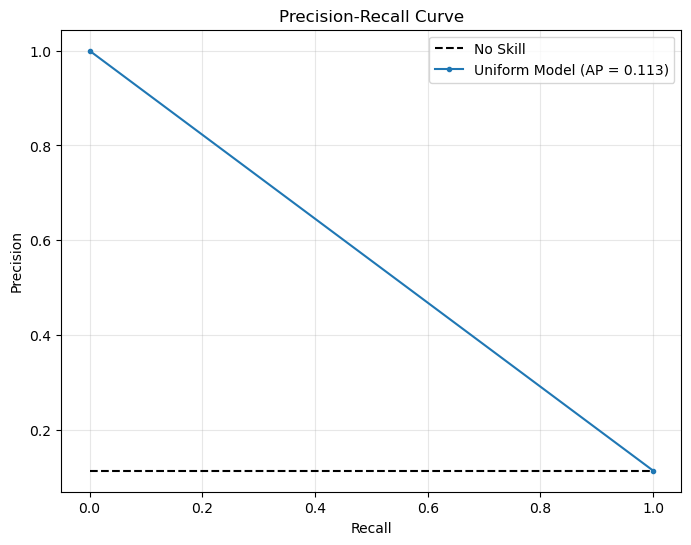

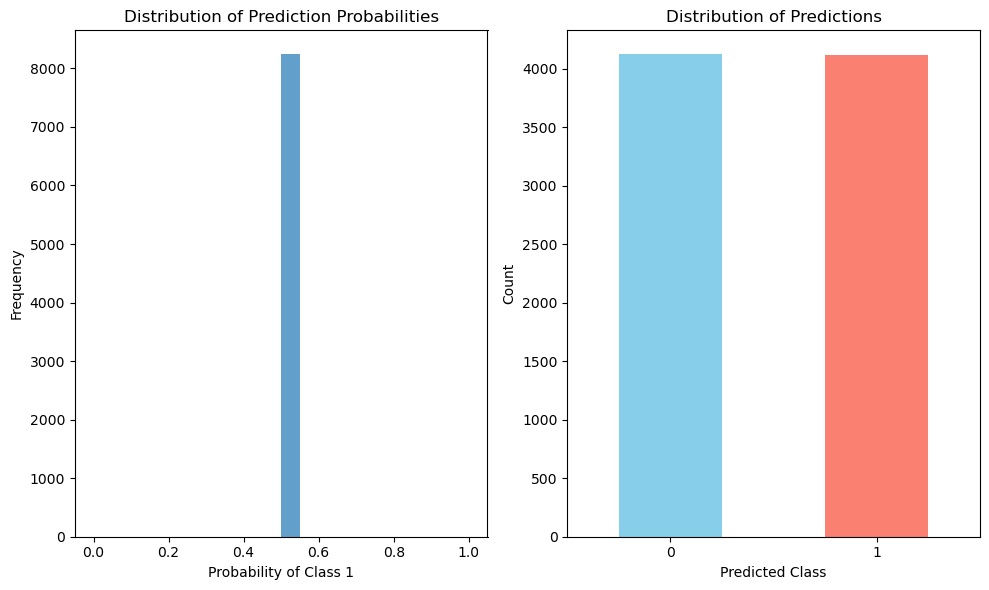

In [18]:
# Display dataset information
print(f"Dataset shape: {df.shape}")
print(f"\nTarget variable distribution:")
print(df['y'].value_counts(normalize=True).to_string())
print(f"\nTotal count: {df['y'].value_counts().sum()}")


# Create uniform no-skill baseline model
strategy = 'uniform'
model_name = f'Uniform No-Skill Model'
dummy = DummyClassifier(strategy=strategy, random_state=42)

# Fit the model
print(f"\nTraining {model_name}...")
start_time = time.time()
dummy.fit(X_train, y_train)
end_time = time.time()
fit_time = end_time - start_time
print(f"Training completed in {fit_time:.4f} seconds")

# Get predictions
y_pred = dummy.predict(X_test)
y_proba = dummy.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

# Display metrics table
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC', 'Training Time (s)'],
    'Value': [accuracy, precision, recall, f1, roc_auc, pr_auc, fit_time]
}
metrics_df = pd.DataFrame(metrics)
print("\nPerformance Metrics:")
print(metrics_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Calculate additional metrics
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print(f"\nAdditional Metrics:")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

# Display full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

# Add text annotations to the confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.yticks([0, 1], ['No (0)', 'Yes (1)'])
plt.colorbar()
plt.tight_layout()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))

# Calculate the no skill line (proportion of samples of the positive class)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], 'k--', label='No Skill')

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, marker='.', label=f'Uniform Model (AP = {pr_auc:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

# Generate predictions on random samples to visualize randomness
sample_size = 20
random_indices = np.random.choice(len(X_test), sample_size, replace=False)
X_sample = X_test.iloc[random_indices]
y_sample_true = y_test.iloc[random_indices]
y_sample_pred = dummy.predict(X_sample)
y_sample_proba = dummy.predict_proba(X_sample)[:, 1]

# Create a df for visualization
sample_df = pd.DataFrame({
    'True Label': y_sample_true,
    'Predicted Label': y_sample_pred,
    'Prediction Probability': y_sample_proba
})

# Show the distribution of predictions to verify uniformity
plt.figure(figsize=(10, 6))

# Plot prediction probabilities histogram
plt.subplot(1, 2, 1)
plt.hist(y_proba, bins=20, alpha=0.7)
plt.title('Distribution of Prediction Probabilities')
plt.xlabel('Probability of Class 1')
plt.ylabel('Frequency')

# Plot prediction counts
plt.subplot(1, 2, 2)
pd.Series(y_pred).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#### Baseline No-skill Results

**These are the performance indicators that we need to beat:**


Performance Metrics:

- Accuracy `0.5032`

- Precision `0.1164`

- Recall `0.5123`

- F1 Score `0.1897`

- ROC AUC `0.5000`

- PR AUC `0.1135`

- Training Time (s) `0.0012`



Confusion Matrix:

- True Negatives: `3666`

- False Positives: `3637`

- False Negatives: `456`

- True Positives: `479`


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [19]:
# Create logistic regression pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=43, max_iter=1000))
])

# Use L2, and parameter variations
param_grid = {
    # L2 penalty options
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'classifier__penalty': ['l2'],
    'classifier__class_weight': [None, 'balanced']
}

#Create GridSearchCV Cross-Validation
grid_search = GridSearchCV(
    estimator=logistic_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

Train Model

In [20]:
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
fit_time = end_time - start_time

print(f"\nGridSearchCV completed in {fit_time:.2f} seconds")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits

GridSearchCV completed in 61.61 seconds
Best parameters: {'classifier__C': 1, 'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validation score: 0.9112


Run Model Predictions

In [21]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

Get and Analyze Prediction Results

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

# Display metrics table
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC', 'Training Time (s)'],
    'Value': [accuracy, precision, recall, f1, roc_auc, pr_auc, fit_time]
}
metrics_df = pd.DataFrame(metrics)
print("\nPerformance Metrics:")
print(metrics_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Calculate additional metrics
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print(f"\nAdditional Metrics:")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

# Display full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Performance Metrics:
           Metric   Value
         Accuracy  0.9114
        Precision  0.6705
           Recall  0.4310
         F1 Score  0.5247
          ROC AUC  0.9349
           PR AUC  0.6005
Training Time (s) 61.6091

Confusion Matrix:
True Negatives: 7105
False Positives: 198
False Negatives: 532
True Positives: 403

Additional Metrics:
Specificity (True Negative Rate): 0.9729

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



Rsults Metrics Plots

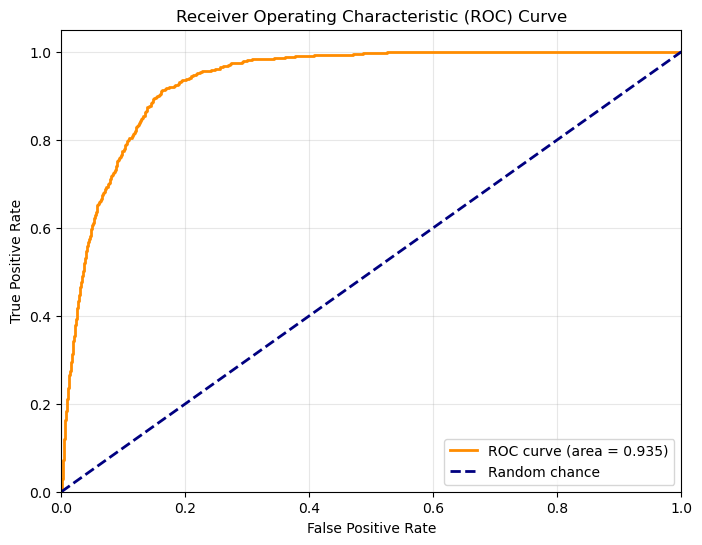

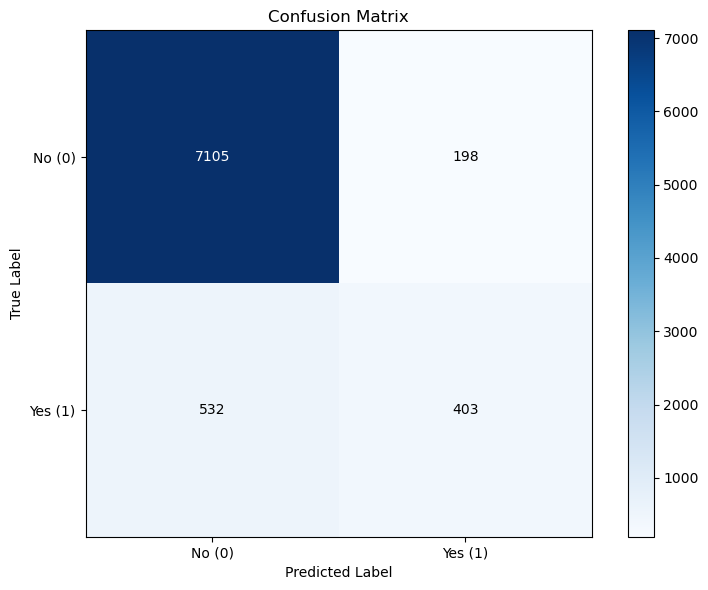

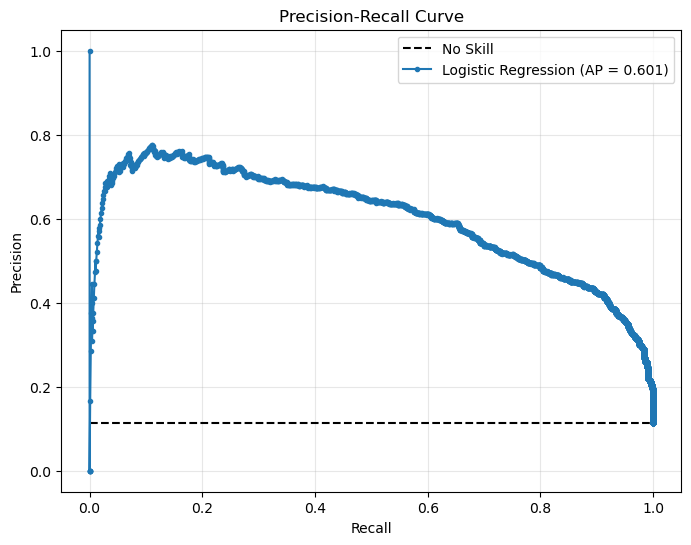

In [24]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

# Add text annotations to the confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.yticks([0, 1], ['No (0)', 'Yes (1)'])
plt.colorbar()
plt.tight_layout()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))

# Calculate the no skill line (proportion of samples of the positive class)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], 'k--', label='No Skill')

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, marker='.', label=f'Logistic Regression (AP = {pr_auc:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()


### Problem 9: Score the Model

What is the accuracy of your model?

Performance Metrics:

Metric      Value

Accuracy    `0.9114`

Precision   `0.6705`

Recall      `0.4310`

F1 Score    `0.5247`

ROC AUC     `0.9349`

PR AUC      `0.6005`

Training Time (s) `61.6091`

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
# Create models with parameter grids for GridSearchCV
models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__solver': ['liblinear', 'saga']
        }
    },
    'SVC': {
        'model': SVC(probability=True),
        'params': {
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'Decision Tree': {  # Added Decision Tree model
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 5, 10, 15],
            'classifier__min_samples_split': [2, 5, 10]
        }
    }
}
# Compare models using GridSearchCV
results = []
best_models = {}
y_pred_dict = {}
y_proba_dict = {}
plt.figure(figsize=(10, 8))
for name, model_info in models.items():
    print(f"\nTraining {name}...")
  
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_info['model'])
    ])
  
    # Create GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        model_info['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
  
    # Measure fitting time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time
  
    # Store best model
    best_models[name] = grid_search.best_estimator_
  
    # Calculate scores
    train_score = grid_search.best_estimator_.score(X_train, y_train)
    test_score = grid_search.best_estimator_.score(X_test, y_test)
  
    # Get predictions
    y_pred_dict[name] = grid_search.best_estimator_.predict(X_test)
    y_proba_dict[name] = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
  
    # Calculate and plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba_dict[name])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
  
    results.append({
        'model': name,
        'train_score': train_score,
        'test_score': test_score,
        'cv_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'avg_fit_time': fit_time
    })
# Create DataFrame for results
results_df = pd.DataFrame(results)
# Display results in the required format
print("\n\nModel Comparison Report:\n")
print(results_df[['model', 'train_score', 'test_score', 'cv_score', 'avg_fit_time']].to_string(index=False))
print("\n\nBest Parameters for Each Model:")
for name in models.keys():
    model_results = results_df[results_df['model'] == name]
    print(f"\n{name}:")
    print(f"  {model_results['best_params'].values[0]}")
# Finalize and display ROC curve plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()
# Create confusion matrix visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, (name, y_pred) in enumerate(y_pred_dict.items()):
    cm = confusion_matrix(y_test, y_pred)
    im = axes[i].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[i].set_title(f'Confusion Matrix: {name}')
  
    # Display values in the cells
    thresh = cm.max() / 2
    for j in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            axes[i].text(k, j, cm[j, k], 
                    ha="center", va="center", 
                    color="white" if cm[j, k] > thresh else "black")
  
    axes[i].set_xlabel('Predicted label')
    axes[i].set_ylabel('True label')
    axes[i].set_xticks([0, 1])
    axes[i].set_yticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])
    axes[i].set_yticklabels(['No', 'Yes'])
plt.tight_layout()
plt.show()
# Display feature importance for Decision Tree (since it's interpretable)
if 'Decision Tree' in best_models:
    # Get feature names after preprocessing
    tree_model = best_models['Decision Tree'].named_steps['classifier']
  
    # Try to get feature names if the preprocessor has get_feature_names_out method
    try:
        feature_names = best_models['Decision Tree'].named_steps['preprocessor'].get_feature_names_out()
      
        # Get feature importance
        importances = tree_model.feature_importances_
      
        # Sort feature importance
        indices = np.argsort(importances)[::-1]
      
        # Plot top 15 features
        plt.figure(figsize=(10, 6))
        plt.title('Feature Importance (Decision Tree)')
        plt.bar(range(min(15, len(indices))), importances[indices[:15]], align='center')
        plt.xticks(range(min(15, len(indices))), [feature_names[i] for i in indices[:15]], rotation=90)
        plt.tight_layout()
        plt.show()
    except:
        print("\nCouldn't extract feature names for Decision Tree visualization")
# Display detailed classification reports
print("\nDetailed Classification Reports:")
for name, y_pred in y_pred_dict.items():
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions